C:\Users\suruchi\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of Clusters: 7
Cluster 0: [31, 36, 38, 40, 47, 51, 56, 61, 62, 65, 66, 71, 74, 77, 78, 84, 85, 90, 98]
Cluster 1: [34, 43, 52, 54, 63, 70, 73, 75, 76, 81, 87, 94, 96, 99]
Cluster 2: [0, 2, 4, 6, 7, 8, 9]
Cluster 3: [3, 13, 24, 29]
Cluster 4: [10, 14, 17, 18, 20, 22, 23, 25, 26, 32, 58]
Cluster 5: [30, 33, 37, 39, 41, 44, 46, 49, 50, 53, 55, 59, 60, 64, 67, 68, 69, 72, 79, 82, 83, 86, 89, 91, 92, 93, 97]
Cluster 6: [1, 5, 11, 12, 15, 16, 19, 21, 27, 28, 35, 42, 45, 48, 57, 80, 88, 95]
100


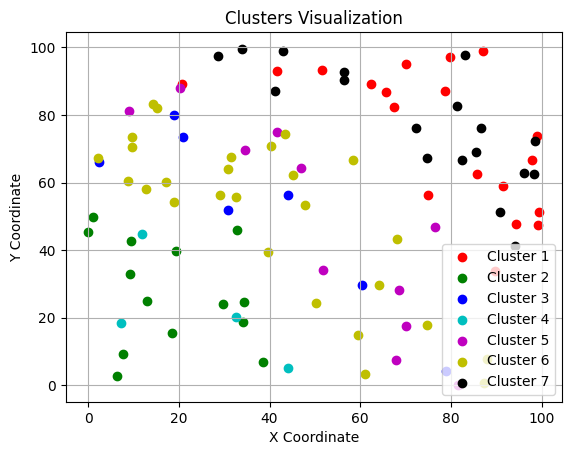

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def visualize_clusters(data, cluster_assignments):
    # Extract x and y coordinates from data
    x = data[:, 0]
    y = data[:, 1]

    # Define colors for each cluster
    colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    # Plot data points with different colors for each cluster
    for i, label in enumerate(set(cluster_assignments)):
        cluster_data = data[cluster_assignments == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i % len(colors)], label=f'Cluster {label + 1}')

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Clusters Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

num_nodes = 100
high_level_nodes = int(0.1 * num_nodes)
mid_level_nodes = int(0.2 * num_nodes)
low_level_nodes = num_nodes - high_level_nodes - mid_level_nodes

high_energy_nodes = [[np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(1.5, 2)] for _ in range(high_level_nodes)]
mid_energy_nodes =  [[np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(1, 1.5)] for _ in range(mid_level_nodes)]
low_energy_nodes =  [[np.random.uniform(0, 100), np.random.uniform(0, 100), np.random.uniform(0, 1)] for _ in range(low_level_nodes)]
data = high_energy_nodes + mid_energy_nodes + low_energy_nodes
data = np.array(data)

# Calculate distance from base station (replace this with your calculation)
# base_station = np.array([50, 50])
base_station = np.array([0, 0])
distances = np.linalg.norm(data[:, :2] - base_station, axis=1)

# Combine features (energy level and distance) for clustering
features = np.column_stack((data[:, 2], distances))

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the number of clusters
min_clusters = max(1, int(0.05 * len(data)))  # 5% of data points
max_clusters = int(np.sqrt(len(data)))  # sqrt(n) clusters
num_clusters = np.random.randint(min_clusters, max_clusters + 1)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(scaled_features)

# Get cluster assignments
cluster_assignments = kmeans.labels_

# Count the number of clusters
num_clusters = len(set(cluster_assignments))

# Initialize dictionary to store cluster members
cluster_members = {i: [] for i in range(num_clusters)}

# Populate cluster members dictionary
for i, label in enumerate(cluster_assignments):
    cluster_members[label].append(i)

# Print number of clusters and cluster members
print("Number of Clusters:", num_clusters)
count = 0
for cluster, members in cluster_members.items():
    print(f"Cluster {cluster}: {members}")
    count += len(members)
# print("Cluster Assignments:", cluster_assignments)
print(count)
visualize_clusters(data, cluster_assignments)

Best Solution:  [47.26905369 41.22507767]
Best Solution:  [55.02083319 42.45223858]
Best Solution:  [55.02083319 42.45223858]
Best Solution:  [55.02083319 42.45223858]
Best Solution:  [55.02083319 42.45223858]
Best Solution:  [55.02083319 42.45223858]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [53.94261463 44.55441946]
Best Solution:  [51.56178531 43.95762403]
Best Solution:  [51.56178531 43.95762403]
Best Solution:  [51.56178531 43.95762403]
Best Solution:  [51.56178531 43.95762403]
Best Solution:  [51.56178531 43.95762403]


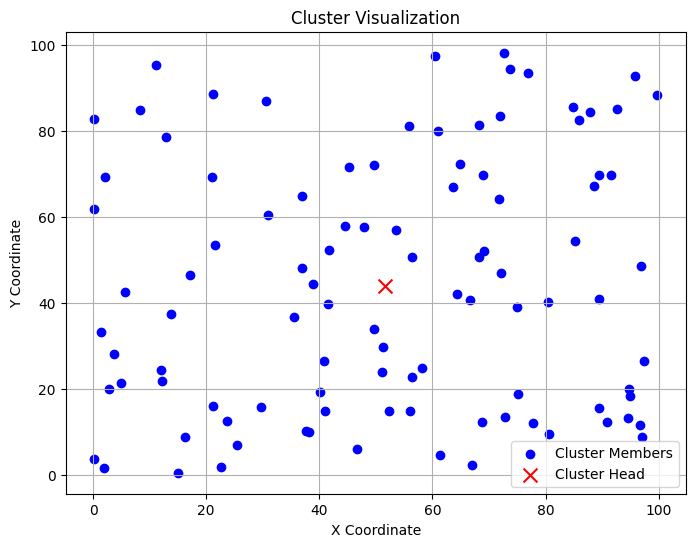

Cluster Head Position: [51.56178531 43.95762403]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_virtual_point(num_dimensions):
    # Randomly initialize the position of the virtual point within the cluster's boundary
    # return cluster_member_positions.copy()
        return [np.random.uniform(0, 100), np.random.uniform(0, 100)]

def evaluate_fitness(virtual_point_position, cluster_member_positions):
    # Define an objective function to evaluate the fitness of the virtual point
    # Evaluate the distance between the virtual point and each cluster member
    distances = np.linalg.norm(cluster_member_positions - virtual_point_position, axis=1)
    # return distances.min()  # Fitness is the minimum distance to any cluster member
    # print("Distance of virtual point from all points: ", distances)
    fitness = np.sum(distances)
    # print("Fitness: ", fitness)
    return fitness

def update_position(virtual_point_position, cluster_member_positions, a, A):
    # Update the position of the virtual point based on the WOA algorithm
    p = np.random.random()
    if p < 0.5:
        """
            Using the mean of cluster member positions in the update equation introduces a bias towards the center of the cluster. This can be beneficial if you want the virtual point (cluster head) to gravitate towards the central region of the cluster, potentially improving coverage and connectivity within the cluster. It also helps in maintaining the cluster head within the cluster boundary.

            On the other hand, excluding the mean of cluster member positions from the update equation allows for more exploration in the search space. The virtual point may explore areas outside the immediate vicinity of the cluster members, potentially discovering better cluster head positions, especially if the optimal cluster head position lies away from the center of the cluster.
        """
        # return np.clip(virtual_point_position - A * np.abs(A * np.random.random() - cluster_member_positions.mean(axis=0)), 0, 1)
        return np.clip(virtual_point_position - A * np.abs(A * np.random.random()), 0, 1)
    else:
        # return np.clip(virtual_point_position + A * np.abs(A * np.random.random() - cluster_member_positions.mean(axis=0)), 0, 1)
        return np.clip(virtual_point_position + A * np.abs(A * np.random.random()), 0, 1)

def objective_function(x):
    return sum(x**2)

def whale_optimization_algorithm(objective_function, real_positions, num_dimensions, num_whales, max_iterations, lb=0, ub=100):
    # Initialize whales positions with random values from uniform distribution. p(x) = 1 / (ub - lb)
    # whales_position = np.random.uniform(lb, ub, (num_whales, num_dimensions))
    whales_position = real_positions.copy()
    best_solution = None
    best_fitness = float('inf')
    all_whales_positions = []  # Store positions of all whales for visualization

    for iteration in range(max_iterations):
        all_whales_positions.append(whales_position.copy())  # Store current positions for visualization
        a = 2 - 2 * iteration / max_iterations
        for i in range(num_whales):
            leader_index = np.random.randint(num_whales)
            leader_position = whales_position[leader_index]

            A = 2 * a * np.random.random() - a
            C = 2 * np.random.random()
            p = np.random.random()

            if p < 0.5:
                new_position = leader_position - A * np.abs(C * leader_position - whales_position[i])
            else:
                random_whale_index = np.random.randint(num_whales)
                D = np.abs(leader_position - whales_position[random_whale_index])
                new_position = D * np.exp(0.1 * A) * np.cos(2 * np.pi * A) + leader_position

            new_position = np.clip(new_position, lb, ub)
            fitness = objective_function(new_position, real_positions)

            if fitness < best_fitness:
                best_solution = new_position
                best_fitness = fitness

            # if fitness < objective_function(whales_position[i], real_positions[i]):
            whales_position[i] = new_position
        print("Best Solution: ", best_solution)
    # return best_solution, best_fitness, all_whales_positions
    print("Best Solution: ", best_solution)
    return best_solution

# def WOA_find_cluster_head(cluster_member_positions, num_dimensions, max_iterations=100):
    # Perform Whale Optimization Algorithm to find the cluster head
    A = 2  # Constant
    a = 2  # Constant

    virtual_point_position = initialize_virtual_point(num_dimensions)
    best_virtual_point_position = None
    best_fitness = float('inf')

    for _ in range(max_iterations):
        fitness = evaluate_fitness(virtual_point_position, cluster_member_positions)
        # print(fitness)
        if fitness < best_fitness:
            best_fitness = fitness
            best_virtual_point_position = virtual_point_position
            print(f"Iteration: {_}, Best Position: {best_virtual_point_position}, Best Fitness: {best_fitness}")
            # print(_, best_virtual_point_position, best_fitness)
        virtual_point_position = update_position(virtual_point_position, cluster_member_positions, a, A)
        # print(virtual_point_position)

    # Find the cluster member closest to the virtual point as the cluster head
    cluster_head_index = np.argmin(np.linalg.norm(cluster_member_positions - best_virtual_point_position, axis=1))
    cluster_head = cluster_member_positions[cluster_head_index]
    return cluster_head

    # return best_virtual_point_position

def visualize_cluster(cluster_member_positions, cluster_head_position):
    # Visualize the data points and cluster head
    plt.figure(figsize=(8, 6))
    plt.scatter(cluster_member_positions[:, 0], cluster_member_positions[:, 1], color='blue', label='Cluster Members')
    plt.scatter(cluster_head_position[0], cluster_head_position[1], color='red', label='Cluster Head', marker='x', s=100)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Cluster Visualization')
    plt.legend()
    plt.grid(True)
    plt.show()

def update_plot(num_dimensions, num_whales, max_iterations, mutation_rate):
    lb = 0
    ub = 100
    best_solution, best_fitness, all_whales_positions = whale_optimization_algorithm(objective_function, num_dimensions, num_whales, max_iterations, lb, ub)
    
    # Plotting
    fig, ax = plt.subplots()
    ax.set_xlim(lb, ub)
    ax.set_ylim(lb, ub)
    ax.set_title("Whale Optimization Algorithm")

    # Animation function
    def animate(frame):
        ax.clear()
        ax.set_xlim(lb, ub)
        ax.set_ylim(lb, ub)
        ax.set_title("Whale Optimization Algorithm - Iteration {}".format(frame))
        ax.scatter(all_whales_positions[frame][:, 0], all_whales_positions[frame][:, 1], color='blue', label='Whales')
        ax.scatter(best_solution[0], best_solution[1], color='red', label='Best Solution')
        ax.legend()

    # Create animation
    anim = FuncAnimation(fig, animate, frames=len(all_whales_positions), repeat=False)
    plt.close()  # Prevents double plotting in Jupyter notebook
    display(HTML(anim.to_html5_video()))


num_nodes = 100
high_level_nodes = int(0.1 * num_nodes)
mid_level_nodes = int(0.2 * num_nodes)
low_level_nodes = num_nodes - high_level_nodes - mid_level_nodes

high_energy_nodes = [[np.random.uniform(0, 100), np.random.uniform(0, 100)] for _ in range(high_level_nodes)]
mid_energy_nodes =  [[np.random.uniform(0, 100), np.random.uniform(0, 100)] for _ in range(mid_level_nodes)]
low_energy_nodes =  [[np.random.uniform(0, 100), np.random.uniform(0, 100)] for _ in range(low_level_nodes)]
data = high_energy_nodes + mid_energy_nodes + low_energy_nodes

# Example usage
cluster_member_positions = np.array(data)  # Positions of cluster members
num_dimensions = 2  
max_iterations = 20

# cluster_head = WOA_find_cluster_head(cluster_member_positions, num_dimensions, max_iterations)
cluster_head = whale_optimization_algorithm(evaluate_fitness, cluster_member_positions, num_dimensions, num_nodes, max_iterations)
visualize_cluster(cluster_member_positions, cluster_head)
print("Cluster Head Position:", cluster_head)
